#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import plotly.express as px

In [2]:
url ='https://raw.githubusercontent.com/Karl-Sancho/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
data_customer = pd.json_normalize(df['customer'])
data_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [5]:
data_phone = pd.json_normalize(df['phone'])
data_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [6]:
data_internet = pd.json_normalize(df['internet'])
data_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [7]:
data_account = pd.json_normalize(df['account'])
data_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
# Concatenar los datos normalizados con el DataFrame original

df_final = pd.concat([df[['customerID', 'Churn']], data_customer, data_phone, data_internet, data_account], axis=1)
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
df_final.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [11]:
#contando valores nulos
df_final.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#🔧 Transformación

In [12]:
# Verifique si hay valores únicos en cada columna
for col in df_final.columns:
  print(f"valores únicos en la columna'{col}': {df_final[col].nunique()}")
  if df_final[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df_final[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'tenure': 73
valores únicos en la columna'PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores único

In [13]:
# Verificando si hay duplicados
duplicados = df_final.duplicated().sum()
print(f"Numero de lineas duplicadas: {duplicados}")

# Verificando se hay valores Nulos
valores_nulos = df_final.isnull().values.sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])

Numero de lineas duplicadas: 0

Valores nulos por columna:
[]


In [14]:
valores_en_blanco_o_vacio = df_final.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o string vacios por columna:
Churn            224
Charges.Total     11
dtype: int64


In [15]:
#Cambiando la columna "account.Charges.Total" a Float

df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
print(df_final['Charges.Total'].dtype)

float64


In [16]:
# Eliminando las columnas de Churn

df_final = df_final[df_final['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_final))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [17]:
df_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30
print(df_final[['Charges.Monthly', 'Cuentas_Diarias']])

      Charges.Monthly  Cuentas_Diarias
0               65.60         2.186667
1               59.90         1.996667
2               73.90         2.463333
3               98.00         3.266667
4               83.90         2.796667
...               ...              ...
7262            55.15         1.838333
7263            85.10         2.836667
7264            50.30         1.676667
7265            67.85         2.261667
7266            59.00         1.966667

[7043 rows x 2 columns]


/tmp/ipython-input-18-2179939507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30


In [19]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [20]:
df_final['Churn_bool'] = df_final['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print(df_final[['Churn', 'Churn_bool']])

     Churn  Churn_bool
0       No           0
1       No           0
2      Yes           1
3      Yes           1
4      Yes           1
...    ...         ...
7262    No           0
7263   Yes           1
7264    No           0
7265    No           0
7266    No           0

[7043 rows x 2 columns]


In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

#📊 Carga y análisis

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
fig_1 = px.histogram(df_final, x = 'Churn', text_auto = True, color = 'Churn', barmode = 'group')
fig_1.update_layout(width=800, height=400, xaxis_title='Churn', yaxis_title='Cantidad',
                  font_family='Arial', font_size=14, font_color='grey')
fig_1.write_html('/content/drive/MyDrive/TelecomX_LATAM/fig_1.html')
fig_1.show()

In [24]:
px.histogram(df_final, x = 'gender', text_auto = True, color = 'Churn', barmode = 'group')

In [25]:
px.histogram(df_final, x = 'SeniorCitizen', text_auto = True, color = 'Churn', barmode = 'group')

In [26]:
px.histogram(df_final, x = 'Partner', text_auto = True, color = 'Churn', barmode = 'group')

In [27]:
px.histogram(df_final, x = 'Dependents', text_auto = True, color = 'Churn', barmode = 'group')

In [28]:
px.histogram(df_final, x = 'tenure', text_auto = True, color = 'Churn', barmode = 'group')

In [29]:
px.histogram(df_final, x = 'Contract', text_auto = True, color = 'Churn', barmode = 'group')

In [30]:
px.scatter(df_final,
           x="tenure",
           y="Charges.Monthly",
           color="Churn",
           title="Tenure vs Cargos mensuales por Churn")

In [31]:
px.histogram(df_final, x = 'PaymentMethod', text_auto = True, color = 'Churn', barmode = 'group')

In [32]:
px.histogram(df_final, x = 'Charges.Total', text_auto = True, color = 'Churn', barmode = 'group')

In [33]:
px.histogram(df_final, x = 'Charges.Monthly', text_auto = True, color = 'Churn', barmode = 'group')

In [34]:
df_final['Churn_number'] = df_final['Churn'].map({'Yes': 1, 'No': 0})
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [35]:
df_final['Churn_number'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

In [36]:
correlation_matrix = df_final.corr(numeric_only=True)
print(correlation_matrix['Churn_number'].sort_values(ascending=False))

Churn_number       1.000000
Churn_bool         1.000000
Charges.Monthly    0.193356
Cuentas_Diarias    0.193356
SeniorCitizen      0.150889
Charges.Total     -0.199484
tenure            -0.352229
Name: Churn_number, dtype: float64


In [37]:
px.box(df_final, x = 'Churn_number', y = 'Charges.Monthly')

In [38]:
df_final.drop(['Churn_bool'], axis=1, inplace=True)
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,Churn_number
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1


In [39]:
# matriz de correlación

px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='RdBu', aspect="auto")

In [41]:
df_final.to_csv("datos_tratados.csv", index=False)

#📄Informe final

## Introducción:

🎯 Objetivo:
El propósito principal del análisis es entender por qué los clientes están cancelando sus servicios con Telecom X. Esto se logrará mediante el procesamiento y análisis de los datos de los clientes utilizando Python y sus bibliotecas. El análisis debe extraer información valiosa que sirva como base para: construir modelos predictivos de evasión, y diseñar estrategias efectivas para retener a los clientes.

❌ Problema de evasión de clientes (Churn):
Telecom X está enfrentando una alta tasa de cancelaciones de sus servicios, lo cual representa una pérdida significativa tanto en ingresos como en competitividad. El churn (evasión de clientes) es un problema crítico, ya que indica que muchos clientes dejan de usar el servicio, posiblemente por insatisfacción, mejores ofertas de la competencia o problemas en la atención.
Este fenómeno, si no se comprende y controla, puede afectar gravemente la estabilidad y crecimiento del negocio.

## Limpieza y Tratamiento de Datos:

📥 1. Importación de los datos
El primer paso es traer los datos al entorno de trabajo en Python. Se utiliza la biblioteca pandas para leer el archivo .json
Posterior se normaliza la información (.json_normalize) y se concatenan los datos normalizados con el Data Frame original.

🧹 2. Limpieza de los datos
En esta etapa se identifican y corrigen problemas que puedan afectar el análisis:

a. Revisión general del DataFrame con (df.info()) (df.dtypes) y (df.head())

b. Se verifica la existencia de valores nulos: (df.isna().sum())

c. Se verifica valores únicos en cada columna: con un (for y .nunique)

d. Verificación de duplicados con: (df.duplicated().sum())

e. Verificación y eliminación de valores en blanco o vacios: (df.apply(lambda x: x.astype(str).str.strip() == '').sum()) y (df[df['Churn'].str.strip() != ''])

⚙️ 3. Procesamiento de los datos
Se transforman y preparan los datos para el análisis:

a. Se realiza la creación de nuevas variables:
  - Cuentas diarias
  - Churn_bool

b. Codificación de variables:
  - Se realiza cambio de la columna "Charges.Total" a Float

✅ 4. Verificación final
Antes de avanzar al análisis o modelado, se hace una revisión general para asegurarse de que los datos están limpios y listos:

- df.describe()
- df.info()

## Análisis Exploratorio de Datos:

📊 1. Análisis Exploratorio Univariado:

a. Distribución del estado de cancelación (churn):
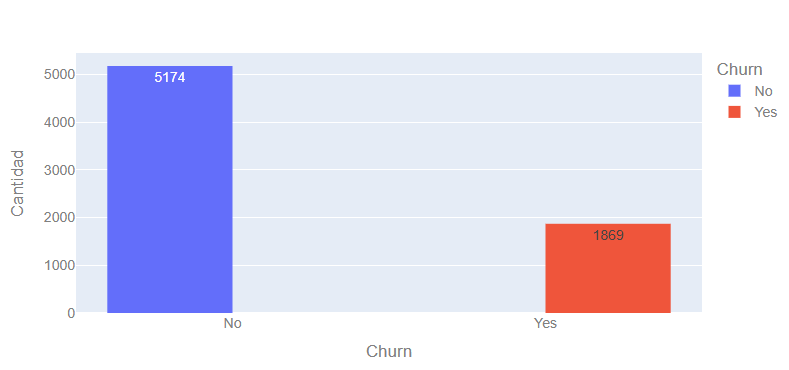

Se evidencia que la proporcion de clientes que cancelan corresponde al 27% lo cual es una cifra que se debe revisar detenidamente para mitigar el impacto en la organización.

b. Distribución por tipo de contrato:
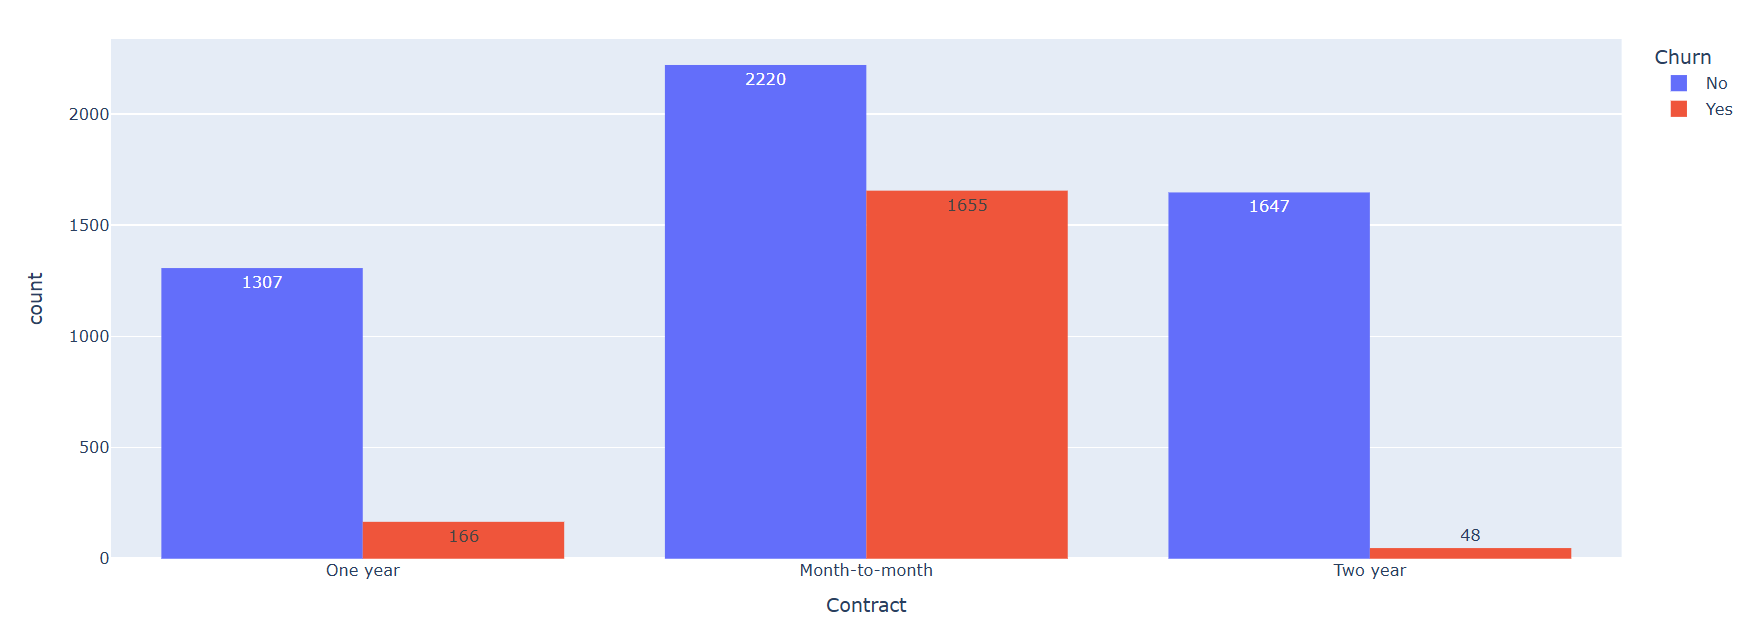

Existe mayor cancelación en los contratos de tipo mensual.

📈 2. Análisis Bivariado
Ayuda a descubrir relaciones entre variables y el churn.

a. Cargos mensuales vs churn
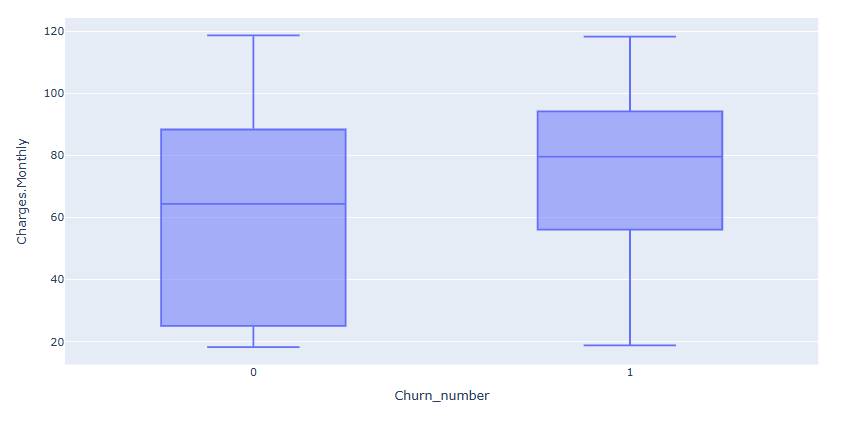

Se identifica que entre mas alto son los cargos mensuales hay mayor tendencia a cancelar.

b. Cargos totales vs churn
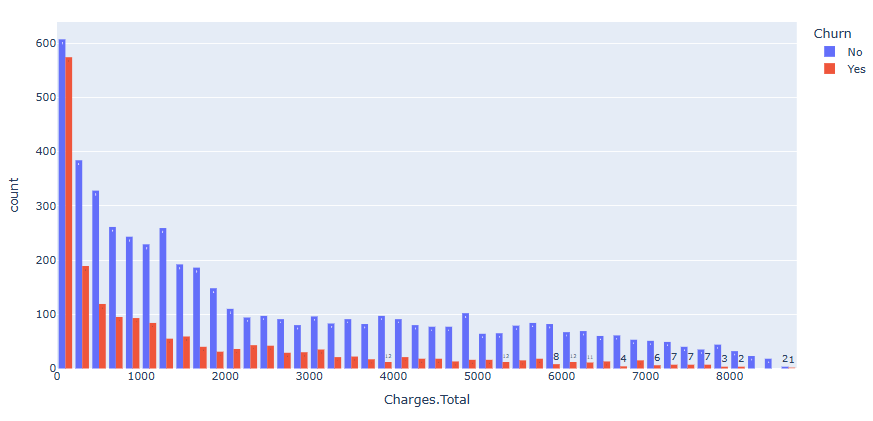

Los clientes con baja facturación total son los más recientes y por ende los que mas cancelan.

🧩 3. Matriz de correlación (para variables numéricas):

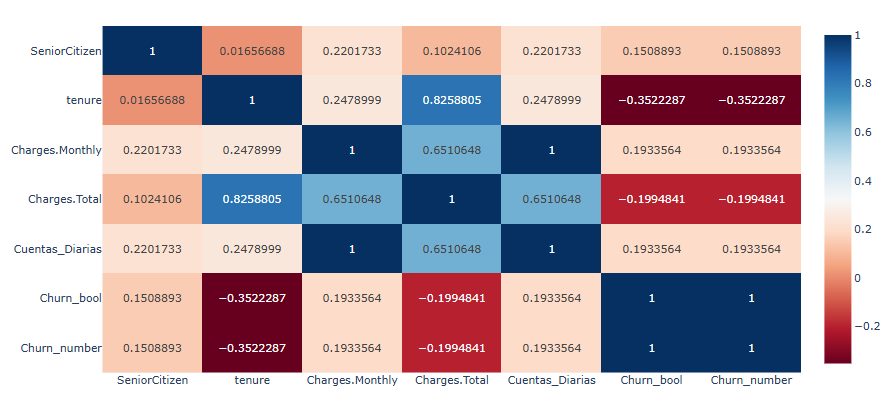

Con esta grafica se analiza la relación entre el Churn y otras variables numericas:

Con respecto a la variable tenure tiene una correlación de -0.35 lo que indica que a mayor tiempo de permanencia los clientes tienden a quedarse; lo que quiere decir que a menor antigüedad mayor probabilidad de cancelación.

Con respecto a la variable Charges.Total tiene una correlación de -0.20 indicando que quienes han gastado mas tienden a no cancelar, lo que indica satisfacción o fidelización por antigüedad.

Con respecto a la variable Charges.Monthly tiene una correlación de +0.19 se identifica que los clientes con carghos mensuales mas altos tienen mayor probabilidad a cancelar. Se perciben costos como excesivos.

De igual manera se identificó una relación fuerte entre las variables tenure con Charges.Total lo que indica que cuanto mayor tiempo esta cliente más a pagado en total.

👥 4. Análisis de permanencia del cliente
Relación entre antigüedad y churn
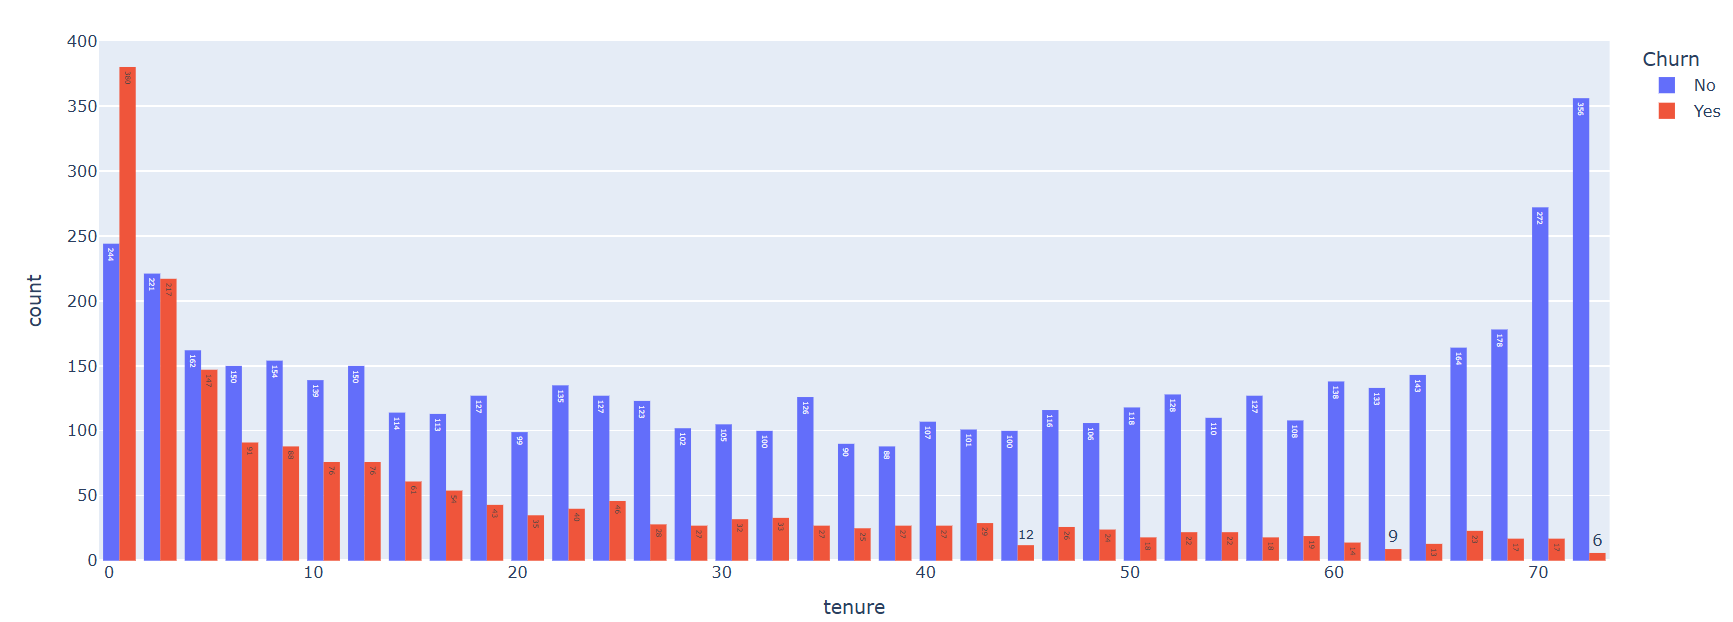

Con esta grafica se puede evidenciar que los clientes nuevos con poco antiguedad son los que mas cancelan los servicios contratados.


## Conclusiones e Insights:

De acuerdo con el analisis realizado se puede evidenciar que los clientes nuevos con cargos mensuales altos son más propensos a cancelar el servicio. Por otro lado, se evidencia que la antiguedad es un factor protector (a mayor permanencia menor cancelación).

Este analisis sugiere una estrategia de fidelización temprana y ofertas para los clientes nuevos. De igual manera, revisar las politicas de los clientes que tienen cargos mensuales altos. atención especializada para clientes seniors y fortalecer las relaciones con los clientes que tienen mas de un servicio.



## Recomendaciones:

1. Fidelización temprana para nuevos clientes.
2. Optimizar planes con cargos mensuales altos.
3. Atención diferenciada a clientes senior.
4. Incentivar paquetes de servicios (bundles).
5. Modelo predictivo de churn.
6. Reforzar relación postventa.